# 프로젝트 1
## : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
# diabetes의 data를 df_X에, target을 df_y에 저장
df_X = diabetes.data
df_y = diabetes.target

In [3]:
# (2),(3) 모델에 입력할 X, y 데이터 준비 (np arr)
print(type(df_X))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# 데이터 모양 확인
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [5]:
# 특성 확인
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [6]:
# 데이터 확인
print('<df_X[0]> : ', df_X[0])
print('<df_y[0]> : ', df_y[0])

<df_X[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
<df_y[0]> :  151.0


In [7]:
# (4) train 데이터와 test 데이터 분리
from sklearn.model_selection import train_test_split

# test 데이터의 비율이 0.3이 되도록 설정 후 분리
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

# 데이터 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [8]:
# (5) 모델 준비하기 (입력 데이터 개수에 맞는 가중치 준비, 모델 함수 구현)
import numpy as np

# 모델 함수 구현 (선형 회귀)
def model(X, W, b):
    predictions = 0
    for i in range(10): # 특성 개수 10개
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 파라미터(가중치)들의 초깃값 설정
W = np.random.rand(10) # 특성 개수 10개
b = np.random.rand()

In [9]:
# (6) 손실함수 Loss 정의 (MSE)

# 손실함수 척도인 MSE를 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

# 손실함수 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [10]:
# (7) 기울기를 구하는 gradient 함수 구현
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [11]:
# (8) 하이퍼 파라미터인 학습률 설정
LEARNING_RATE = 0.01

In [12]:
# (9) 모델 학습

losses = [] # loss의 경향을 보기 위해 epoch당 학습 결과를 담기 위한 list

for i in range(1, 20001): # loss값이 충분히 떨어질 때까지 학습 진행 - 20000번)
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L) # epoch당 학습 결과 append
    # 1000번마다 현재 loss 출력
    if i % 2000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 2000 : Loss 4942.6767
Iteration 4000 : Loss 4284.6325
Iteration 6000 : Loss 3900.0628
Iteration 8000 : Loss 3660.1874
Iteration 10000 : Loss 3500.3154
Iteration 12000 : Loss 3387.2285
Iteration 14000 : Loss 3303.3109
Iteration 16000 : Loss 3238.7980
Iteration 18000 : Loss 3187.9669
Iteration 20000 : Loss 3147.2439


In [13]:
# (10) test 데이터에 대한 성능 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)

print(mse)

2863.1919390489084


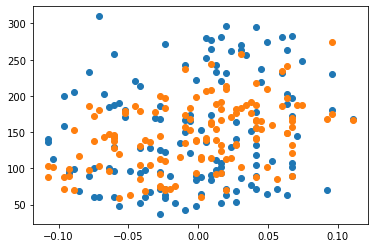

In [14]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
import matplotlib.pyplot as plt

# x축에는 X 데이터의 첫 번째 컬럼, y축에는 정답인 target 데이터
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()